Data Head
  Car_Name  Year  Selling_Price  Present_Price  ...  Fuel_Type Selling_type Transmission Owner
0     ritz  2014           3.35           5.59  ...     Petrol       Dealer       Manual     0
1      sx4  2013           4.75           9.54  ...     Diesel       Dealer       Manual     0
2     ciaz  2017           7.25           9.85  ...     Petrol       Dealer       Manual     0
3  wagon r  2011           2.85           4.15  ...     Petrol       Dealer       Manual     0
4    swift  2014           4.60           6.87  ...     Diesel       Dealer       Manual     0

[5 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-nu

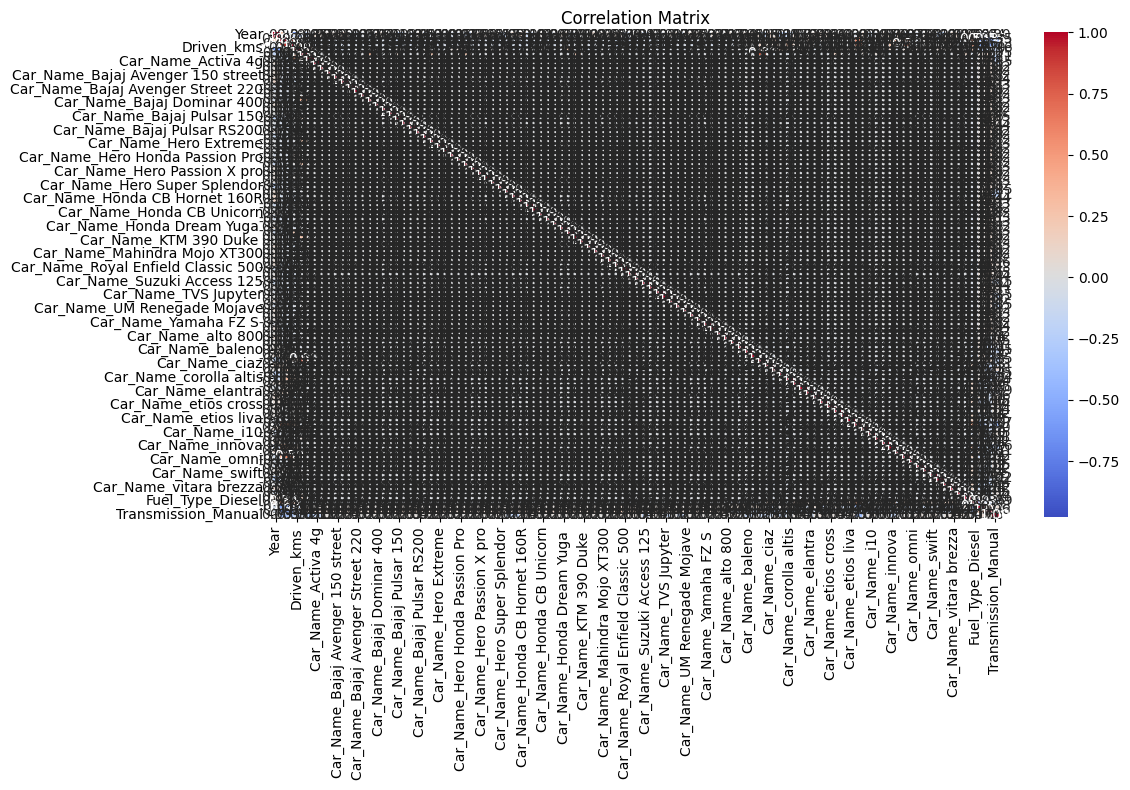


Model Evaluation:
Mean Absolute Error (MAE):1.456811666666667
Mean Squared Error (MSE):12.835063051833343
Root Mean Squared Error (RMSE):3.5826056232626753
R-squared (R2):0.5020008355493821


<ipython-input-12-62e87be2c276>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feature_importance_df,palette='viridis')


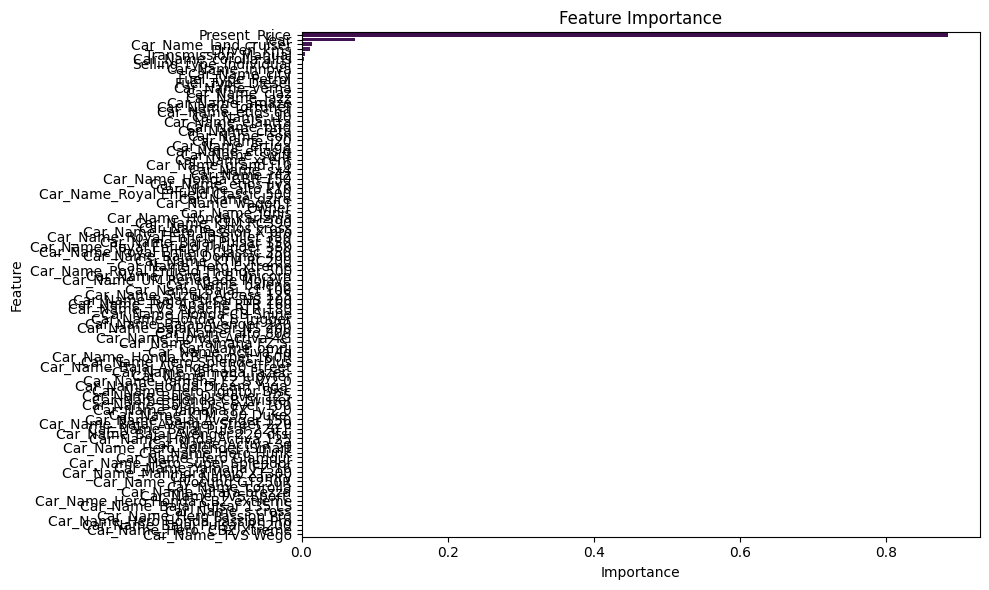

Model saved to car_price_prediction_model.pkl


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('/content/car data.csv')

print("Data Head")
print(data.head())

data.info()

print("\Missing Values:")
print(data.isnull().sum())

data.drop_duplicates(inplace=True)


print("\nDataset Statistics:")
print(data.describe())


categorical_columns=data.select_dtypes(include=['object']).columns
for col in categorical_columns:
  print(f"\nUnique values in {col}:")
  try:
      print(data[col].unique())
  except Exception as e:
       print(f"\nUnique values in column '{col}':")

  data=pd.get_dummies(data,drop_first=True)

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

X=data.drop('Selling_Price',axis=1)
y=data['Selling_Price']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)


model=RandomForestRegressor(random_state=42)
model.fit(X_train,y_train)

y_pred=model.predict(X_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)


print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE):{mae}")
print(f"Mean Squared Error (MSE):{mse}")
print(f"Root Mean Squared Error (RMSE):{rmse}")
print(f"R-squared (R2):{r2}")

importances = model.feature_importances_
feature_names = X.columns
feature_importance_df=pd.DataFrame({'Feature':feature_names,'Importance': importances})
feature_importance_df.sort_values(by='Importance',ascending=False,inplace=True)


plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feature_importance_df,palette='viridis')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()



import joblib
model_path="car_price_prediction_model.pkl"
joblib.dump(model,model_path)
print(f"Model saved to {model_path}")









